In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.impute import SimpleImputer
import plotly.express as px

In [2]:
df = pd.read_csv("heart_disease.csv")

In [3]:
df

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0     56.0    Male           153.0              155.0            High     Yes   
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                     Yes       No  24.991591                 Yes  ...   
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                      No                High       Medium    7.633228   
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes                 NaN         High    8.247784   
9997                  Yes                 NaN          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                Medium              342.0                  NaN  12.969246   
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
...                 ...                ...                  ...        ...   
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
0              12.387250                    No  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
...                  ... 

In [4]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [5]:
df.nunique()

Age                       63
Gender                     2
Blood Pressure            61
Cholesterol Level        151
Exercise Habits            3
Smoking                    2
Family Heart Disease       2
Diabetes                   2
BMI                     9978
High Blood Pressure        2
Low HDL Cholesterol        2
High LDL Cholesterol       2
Alcohol Consumption        3
Stress Level               3
Sleep Hours             9975
Sugar Consumption          3
Triglyceride Level       301
Fasting Blood Sugar       81
CRP Level               9974
Homocysteine Level      9980
Heart Disease Status       2
dtype: int64

In [6]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [7]:
df=df.drop_duplicates()
df

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0     56.0    Male           153.0              155.0            High     Yes   
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                     Yes       No  24.991591                 Yes  ...   
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                      No                High       Medium    7.633228   
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes                 NaN         High    8.247784   
9997                  Yes                 NaN          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                Medium              342.0                  NaN  12.969246   
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
...                 ...                ...                  ...        ...   
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
0              12.387250                    No  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
...                  ... 

In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        most_frequent = df[column].mode()[0]
        df[column] = df[column].fillna(most_frequent)  
    elif df[column].nunique() < 10:  
        df[column] = df[column].fillna(df[column].mode()[0]) 
    else: 
        df[column] = df[column].fillna(df[column].median())



In [9]:
df.isnull().sum()


Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [10]:
columns_check = df.select_dtypes(include=['float64', 'int64']).columns
for column in columns_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[df[column].between(lower_bound, upper_bound)]

In [11]:
missing_value=df.isnull().sum()

In [12]:
missing_value

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [13]:
df.dropna()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0     56.0    Male           153.0              155.0            High     Yes   
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                     Yes       No  24.991591                 Yes  ...   
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                      No                High       Medium    7.633228   
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes              Medium         High    8.247784   
9997                  Yes              Medium          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                Medium              342.0                120.0  12.969246   
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
...                 ...                ...                  ...        ...   
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
0              12.387250                    No  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
...                  ... 

In [14]:
df.describe()

Age  Blood Pressure  Cholesterol Level           BMI  \
count  10000.000000    10000.000000       10000.000000  10000.000000   
mean      49.295400      149.758200         225.427300     29.077274   
std       18.167574       17.556268          43.510401      6.300156   
min       18.000000      120.000000         150.000000     18.002837   
25%       34.000000      134.000000         187.000000     23.668887   
50%       49.000000      150.000000         226.000000     29.079492   
75%       65.000000      165.000000         263.000000     34.509009   
max       80.000000      180.000000         300.000000     39.996954   

        Sleep Hours  Triglyceride Level  Fasting Blood Sugar     CRP Level  \
count  10000.000000        10000.000000         10000.000000  10000.000000   
mean       6.991359          250.732500           120.141900      7.472200   
std        1.751002           86.953962            23.558053      4.334601   
min        4.000605          100.000000            80.000000      0.003647   
25%        5.455288          176.000000            99.000000      3.681800   
50%        7.003252          250.000000           120.000000      7.472164   
75%        8.527938          326.000000           141.000000     11.244879   
max        9.999952          400.000000           160.000000     14.997087   

       Homocysteine Level  
count        10000.000000  
mean            12.456177  
std              4.319100  
min              5.000236  
25%              8.729771  
50%             12.409395  
75%             16.130968  
max             19.999037

In [15]:
df.sample(10)

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
2160  58.0  Female           173.0              187.0             Low     Yes   
3512  57.0  Female           142.0              194.0          Medium     Yes   
8319  69.0  Female           161.0              232.0             Low     Yes   
2119  66.0  Female           177.0              293.0             Low     Yes   
913   77.0  Female           158.0              218.0             Low     Yes   
1273  27.0  Female           151.0              170.0             Low      No   
4706  50.0    Male           128.0              171.0          Medium      No   
7874  30.0    Male           162.0              166.0          Medium      No   
6857  54.0    Male           177.0              154.0          Medium      No   
1280  64.0    Male           163.0              235.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
2160                  Yes       No  31.321529                  No  ...   
3512                  Yes      Yes  24.174009                  No  ...   
8319                   No       No  33.679550                 Yes  ...   
2119                  Yes      Yes  21.387582                  No  ...   
913                   Yes      Yes  28.328413                 Yes  ...   
1273                  Yes      Yes  26.631206                 Yes  ...   
4706                   No      Yes  31.526521                  No  ...   
7874                  Yes      Yes  24.943684                 Yes  ...   
6857                   No      Yes  35.592372                 Yes  ...   
1280                   No       No  38.471156                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
2160                  Yes                High         High    6.164466   
3512                  Yes              Medium          Low    5.944696   
8319                   No              Medium          Low    5.136998   
2119                  Yes                High          Low    4.838424   
913                    No                 Low         High    4.495868   
1273                   No              Medium          Low    7.663289   
4706                  Yes              Medium       Medium    6.619348   
7874                  Yes              Medium          Low    4.726052   
6857                   No                 Low         High    4.379540   
1280                   No              Medium         High    4.572685   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
2160             Medium              250.0                115.0   9.370377   
3512             Medium              391.0                121.0   6.860150   
8319             Medium              324.0                143.0  11.570987   
2119               High              200.0                121.0  10.707290   
913                 Low              313.0                 88.0   4.583069   
1273                Low              308.0                122.0  12.166512   
4706                Low              203.0                120.0  10.159193   
7874               High              135.0                 80.0   2.904369   
6857               High              177.0                110.0  13.998688   
1280             Medium              267.0                 86.0   3.449154   

      Homocysteine Level  Heart Disease Status  
2160           12.640031                    No  
3512           18.530865                    No  
8319           19.051509                   Yes  
2119           16.103570                    No  
913             6.979369                    No  
1273           13.529924                    No  
4706           15.792348                    No  
7874           19.029491                    No  
6857           15.754856                    No  
1280           10.090956                    No  

[10 rows x 21 columns]

In [16]:
df.head (15)

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0   56.0    Male           153.0              155.0            High     Yes   
1   69.0  Female           146.0              286.0            High      No   
2   46.0    Male           126.0              216.0             Low      No   
3   32.0  Female           122.0              293.0            High     Yes   
4   60.0    Male           166.0              242.0             Low     Yes   
5   25.0    Male           152.0              257.0             Low     Yes   
6   78.0  Female           121.0              175.0            High     Yes   
7   38.0  Female           161.0              187.0             Low     Yes   
8   56.0  Female           135.0              291.0             Low      No   
9   75.0    Male           144.0              252.0             Low     Yes   
10  36.0  Female           179.0              191.0            High      No   
11  40.0  Female           134.0              296.0            High      No   
12  28.0  Female           143.0              215.0            High     Yes   
13  28.0  Female           134.0              191.0            High     Yes   
14  41.0  Female           150.0              187.0            High      No   

   Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                   Yes       No  24.991591                 Yes  ...   
1                   Yes      Yes  25.221799                  No  ...   
2                    No       No  29.855447                  No  ...   
3                   Yes       No  24.130477                 Yes  ...   
4                   Yes      Yes  20.486289                 Yes  ...   
5                    No       No  28.144681                  No  ...   
6                   Yes      Yes  18.042332                  No  ...   
7                   Yes      Yes  34.736683                  No  ...   
8                   Yes      Yes  34.493112                 Yes  ...   
9                   Yes       No  30.142149                  No  ...   
10                  Yes       No  34.447618                  No  ...   
11                  Yes      Yes  31.739622                  No  ...   
12                   No      Yes  33.344017                  No  ...   
13                   No       No  19.422428                 Yes  ...   
14                  Yes       No  37.387840                 Yes  ...   

   High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                    No                High       Medium    7.633228   
1                    No              Medium         High    8.744034   
2                   Yes                 Low          Low    4.440440   
3                   Yes                 Low         High    5.249405   
4                    No                 Low         High    7.030971   
5                    No                 Low       Medium    5.504876   
6                    No              Medium       Medium    9.240911   
7                    No                 Low       Medium    7.841008   
8                   Yes                High          Low    6.941403   
9                   Yes                 Low       Medium    4.002662   
10                   No              Medium         High    9.151889   
11                   No              Medium       Medium    6.765162   
12                  Yes              Medium          Low    7.188455   
13                   No                 Low          Low    8.189629   
14                   No              Medium          Low    9.624732   

    Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0              Medium              342.0                120.0  12.969246   
1              Medium              133.0                157.0   9.355389   
2                 Low              393.0                 92.0  12.709873   
3                High              293.0                 94.0  12.509046   
4                High              263.0              

In [17]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [18]:
df.tail(15)

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
9985  75.0    Male           125.0              194.0             Low      No   
9986  23.0    Male           147.0              292.0             Low      No   
9987  34.0    Male           126.0              166.0          Medium      No   
9988  68.0    Male           157.0              292.0            High     Yes   
9989  67.0    Male           176.0              154.0             Low     Yes   
9990  55.0  Female           131.0              160.0            High     Yes   
9991  41.0  Female           160.0              241.0          Medium      No   
9992  68.0  Female           169.0              291.0          Medium     Yes   
9993  27.0  Female           153.0              188.0          Medium      No   
9994  73.0  Female           144.0              191.0          Medium     Yes   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
9985                  Yes       No  34.723266                 Yes  ...   
9986                  Yes      Yes  29.281419                 Yes  ...   
9987                  Yes      Yes  28.693536                  No  ...   
9988                   No       No  38.431932                  No  ...   
9989                  Yes      Yes  23.359268                 Yes  ...   
9990                   No      Yes  32.363462                  No  ...   
9991                  Yes      Yes  39.346342                 Yes  ...   
9992                   No       No  22.839718                  No  ...   
9993                   No      Yes  28.173059                 Yes  ...   
9994                  Yes      Yes  39.459620                  No  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
9985                   No              Medium         High    6.929085   
9986                   No                 Low         High    5.884371   
9987                  Yes              Medium         High    7.233239   
9988                   No              Medium          Low    6.030116   
9989                  Yes                 Low         High    9.269228   
9990                   No                 Low       Medium    5.018783   
9991                  Yes              Medium         High    4.343666   
9992                   No              Medium          Low    6.057509   
9993                   No              Medium       Medium    4.834842   
9994                   No              Medium          Low    7.549114   
9995                  Yes              Medium         High    6.834954   
9996                  Yes              Medium         High    8.247784   
9997                  Yes              Medium          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
9985               High              250.0                153.0   5.023787   
9986                Low              251.0                120.0   1.972977   
9987                Low              378.0                116.0  11.152744   
9988               High     

In [19]:
columns_check = df.select_dtypes(include=['float64', 'int64']).columns

In [20]:
columns_check

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')

In [21]:
df['Age'] = df['Age'].astype(int)

In [22]:
df.groupby([df['Cholesterol Level'].head()])[['Age', 'Gender']].max()

Age  Gender
Cholesterol Level             
155.0               56    Male
216.0               46    Male
242.0               60    Male
286.0               69  Female
293.0               32  Female

In [23]:
df[df['Diabetes']=='No']['Age'].sample(20)

741     68
3123    42
186     31
2720    34
568     69
6028    55
3737    44
546     29
8034    59
6722    28
9065    33
3836    53
8793    39
345     24
4115    60
8971    74
409     52
1637    71
5081    39
6286    62
Name: Age, dtype: int32

In [24]:
# 1. هل  يؤثر العمر على خطر الإصابة بأمراض القلب؟
fig = px.histogram(
    df, 
    x='Age', 
    color='Heart Disease Status', 
    nbins=20, 
    barmode='overlay', 
    title='Age Distribution by Heart Disease Status',
    labels={'Age': 'Age', 'count': 'Count'},
    color_discrete_sequence=['#636EFA', '#EF553B'] 
)
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    legend_title='Heart Disease Status'
)
fig.show()





In [25]:
# 2. هل هناك علاقة بين مؤشر كتلة الجسم وامراض القلب ؟
import plotly.express as px

if 'BMI' in df.columns and 'Heart Disease Status' in df.columns:
    fig = px.histogram(
        data_frame=df, 
        x='Heart Disease Status', 
        y='BMI', 
        histfunc='avg',  # To plot the average BMI for each status
        title='BMI Distribution by Heart Disease Status',
        labels={'Heart Disease Status': 'Heart Disease Status', 'BMI': 'BMI'}
    )
    fig.show()



In [26]:
# 3. ما مدى تأثير عدد ساعات النوم على حالة القلب؟
if 'Sleep Hours' in df.columns and 'Heart Disease Status' in df.columns:
    fig = px.histogram(
        data_frame=df, 
        x='Heart Disease Status', 
        y='Sleep Hours', 
        histfunc='avg',  # Calculate the average Sleep Hours for each status
        title='Sleep Hours by Heart Disease Status',
        labels={'Heart Disease Status': 'Heart Disease Status', 'Sleep Hours': 'Sleep Hours'}
    )
    fig.show()


In [27]:
# 4. هل يؤثر التوتر المزمن مع عوامل أخرى مثل التدخين على زيادة المخاطر؟
if 'Stress Level' in df.columns and 'Smoking' in df.columns:
    fig = px.histogram(
        data_frame=df, 
        x='Stress Level', 
        color='Smoking',  # Use 'color' to differentiate by Smoking
        nbins=30,  # Set number of bins
        title='Stress Level Distribution by Smoking',
        labels={'Stress Level': 'Stress Level', 'Smoking': 'Smoking Status'},
        color_discrete_sequence=['#FF6347', '#4682B4']  # Define custom colors (e.g., Red and Blue)
    )
    fig.show()
else:
    print("Required columns are missing in the DataFrame.")



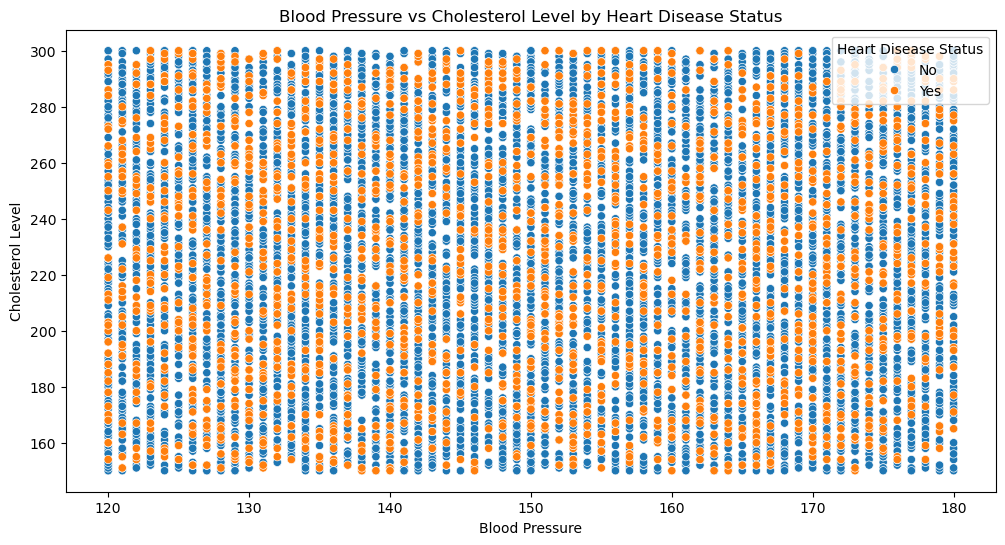

In [28]:
#هل يوجه عولاقه بين كرستول وضغط الدم بمرضي القلب 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Blood Pressure', y='Cholesterol Level', hue='Heart Disease Status')
plt.title('Blood Pressure vs Cholesterol Level by Heart Disease Status')
plt.show()




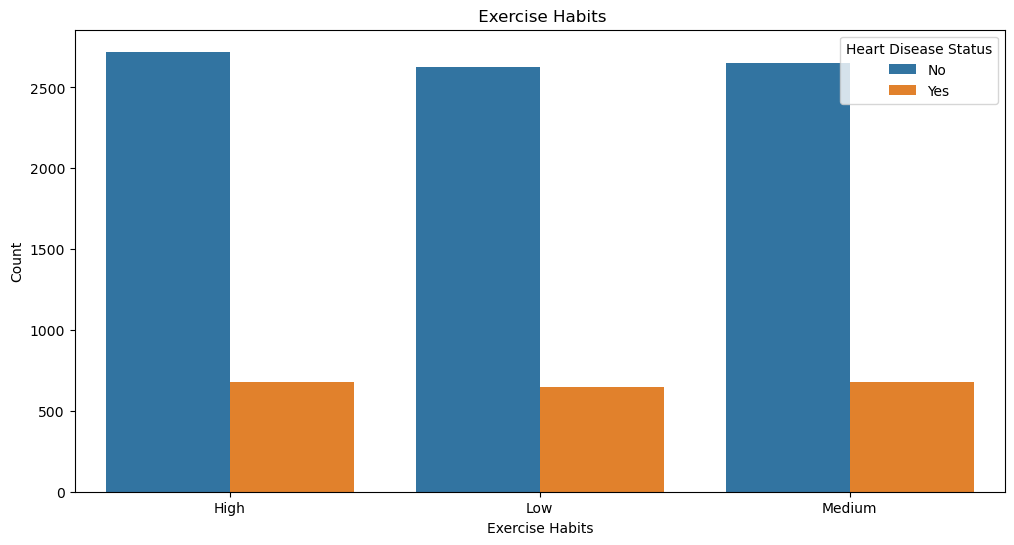

In [29]:
# 6. العلاقة التمارين اليومية مع أمراض القلب
if 'Heart Disease Status' in df.columns and 'Exercise Habits' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Exercise Habits', hue='Heart Disease Status')
    plt.title(' Exercise Habits')
    plt.xlabel('Exercise Habits')
    plt.ylabel('Count')
    plt.show()


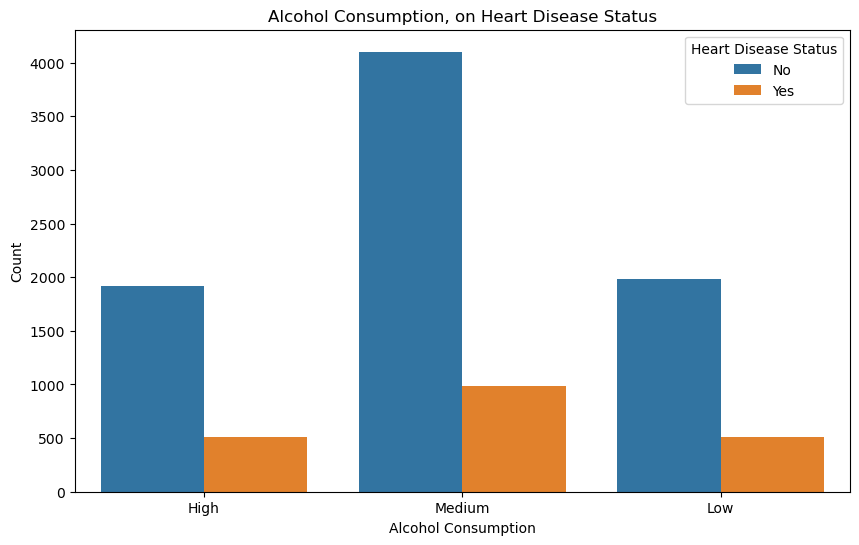

In [30]:
# 7. علاقه استهلاك الكحول لمرضي القلب 
if 'Alcohol Consumption' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Alcohol Consumption', hue='Heart Disease Status')
    plt.title('Alcohol Consumption, on Heart Disease Status')
    plt.xlabel('Alcohol Consumption')
    plt.ylabel('Count')
    plt.legend(title='Heart Disease Status')
    plt.show()


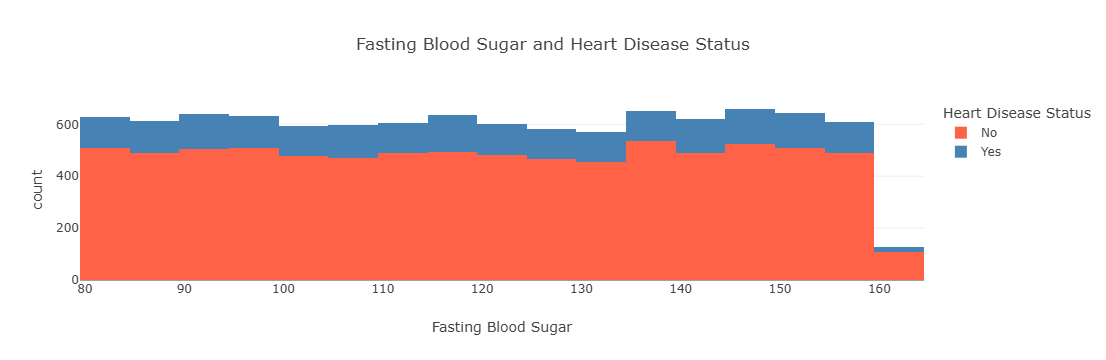

In [31]:
# 8تاثير مرض السكري علي امراض القلب
if 'Fasting Blood Sugar' in df.columns and 'Heart Disease Status' in df.columns:
    fig = px.histogram(
        data_frame=df, 
        x='Fasting Blood Sugar', 
        color='Heart Disease Status',  # Differentiating by Heart Disease Status
        nbins=30,  # Adjust the number of bins
        title='Fasting Blood Sugar and Heart Disease Status',
        labels={'Fasting Blood Sugar': 'Fasting Blood Sugar', 'Heart Disease Status': 'Heart Disease Status'},
        color_discrete_sequence=['#FF6347', '#4682B4']
    )
    fig.show()
else:
    print("Required columns are missing in the DataFrame.")


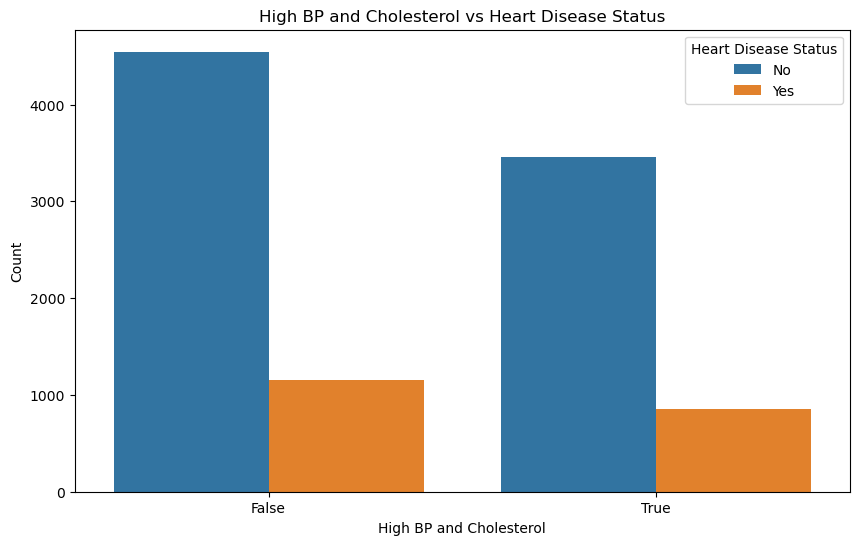

In [32]:
# 9. الجمع بين ارتفاع ضغط الدم والكوليسترول
if {'Blood Pressure', 'Cholesterol Level'}.issubset(df.columns):
    df['High BP & Cholesterol'] = (df['Blood Pressure'] > 140) & (df['Cholesterol Level'] > 200)
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='High BP & Cholesterol', hue='Heart Disease Status')
    plt.title('High BP and Cholesterol vs Heart Disease Status')
    plt.xlabel('High BP and Cholesterol')
    plt.ylabel('Count')
    plt.legend(title='Heart Disease Status')
    plt.show()

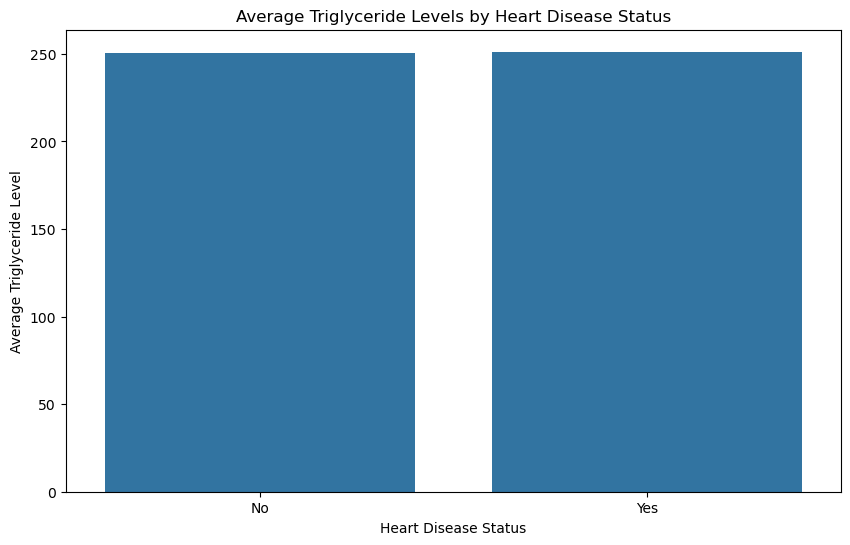

In [33]:
#هل يوجد علاقه بين الدهون الثلاثيه وامراض القلب
if 'Triglyceride Level' in df.columns and 'Heart Disease Status' in df.columns:
    avg_triglyceride = df.groupby('Heart Disease Status')['Triglyceride Level'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_triglyceride, x='Heart Disease Status', y='Triglyceride Level')
    plt.title('Average Triglyceride Levels by Heart Disease Status')
    plt.xlabel('Heart Disease Status')
    plt.ylabel('Average Triglyceride Level')
    plt.show()


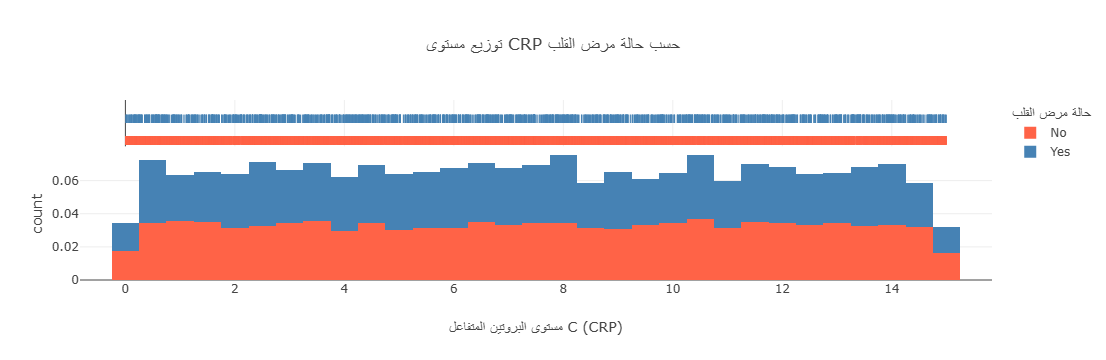

In [43]:

import plotly.express as px

# إنشاء الرسم البياني
fig = px.histogram(df, 
                   x='CRP Level', 
                   color='Heart Disease Status', 
                   marginal="rug", 
                   histnorm='probability',
                   title='توزيع مستوى CRP حسب حالة مرض القلب',
                   color_discrete_sequence=['#FF6347', '#4682B4']   
)

# تحسين التخطيط
fig.update_layout(
    xaxis_title='مستوى البروتين المتفاعل C (CRP)',
    yaxis_title= "count" ,
    legend_title='حالة مرض القلب'
)

# عرض الرسم البياني
fig.show()


In [35]:
df['Triglyceride Level']


0       342.0
1       133.0
2       393.0
3       293.0
4       263.0
        ...  
9995    343.0
9996    377.0
9997    248.0
9998    113.0
9999    121.0
Name: Triglyceride Level, Length: 10000, dtype: float64

In [36]:
%%writefile file.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px
st.title("heart_disease.csv")
st.header("الأسئلة الرئيسية")
st.markdown("""
1. هل يؤثر العمر والجنس معًا على خطر الإصابة بأمراض القلب؟
2. هل هناك علاقة بين مؤشر كتلة الجسم وأمراض القلب؟
3. ما مدى تأثير عدد ساعات النوم على حالة القلب؟
4. هل يؤثر التوتر المزمن مع عوامل أخرى مثل التدخين على زيادة المخاطر؟
5. هل يمكن التنبؤ بحالة الإصابة بناءً على القيم البيوكيميائية؟
6. ما العلاقة بين التمارين اليومية وأمراض القلب؟
7. ما تأثير استهلاك الكحول على مرضى القلب؟
8. ما تأثير مرض السكري على أمراض القلب؟
9. كيف يؤثر الجمع بين ارتفاع ضغط الدم والكوليسترول على أمراض القلب؟
10. ما العلاقة بين حالة الإصابة ومستوى الكوليسترول؟
""")
uploaded_file = st.file_uploader("heart_disease.csv")

if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.subheader("عرض البيانات الأولية")
    st.write(data.head())
    st.subheader("معلومات عامة عن البيانات")
    st.write(data.info())
    st.subheader("تنظيف البيانات")
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            data[column].fillna(data[column].mean(), inplace=True)

    st.write("تمت معالجة البيانات.")
    st.write(data.describe())
    st.header("التحليل الاستكشافي للبيانات (EDA)")
    st.subheader("توزيع القيم المفقودة")
    missing_values = data.isnull().sum()
    st.write(missing_values[missing_values > 0])

    # توزيع الأعمار
    st.subheader("توزيع الأعمار")
    fig, ax = plt.subplots()
    sns.histplot(data['Age'], bins=20, kde=True, ax=ax)
    ax.set_title("توزيع الأعمار")
    st.pyplot(fig)

    # توزيع الجنس
    if 'Gender' in data.columns:
        st.subheader("توزيع ذكر ام انثي")
        gender_counts = data['Gender'].value_counts()
        st.bar_chart(gender_counts)

    # العلاقة بين العمر وأمراض القلب
    if 'Age' in data.columns and 'Heart Disease Status' in data.columns:
        st.subheader("العلاقة بين العمر وحالة أمراض القلب")
        fig, ax = plt.subplots()
        sns.boxplot(data=data, x='Heart Disease Status', y='Age', ax=ax)
        ax.set_title("العمر مقابل حالة الإصابة بأمراض القلب")
        st.pyplot(fig)
     #: توزيع مؤشر كتلة الجسم
    if 'BMI' in data.columns:
        st.subheader("توزيع مؤشر كتلة الجسم (BMI)")
        fig, ax = plt.subplots()
        sns.histplot(data['BMI'], bins=20, kde=True, ax=ax, color="green")
        ax.set_title("توزيع مؤشر كتلة الجسم")
        st.pyplot(fig)

    #  ساعات النوم وأمراض القلب
    if 'Sleep Hours' in data.columns and 'Heart Disease Status' in data.columns:
        st.subheader("العلاقة بين ساعات النوم وحالة أمراض القلب")
        fig, ax = plt.subplots()
        sns.boxplot(data=data, x='Heart Disease Status', y='Sleep Hours', ax=ax, palette="muted")
        ax.set_title("ساعات النوم مقابل حالة الإصابة بأمراض القلب")
        st.pyplot(fig)


Overwriting file.py
